## Cat/Dog Binary Classification

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Conv2D,MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator


import numpy as np
from tensorflow.keras.preprocessing import image

In [26]:
## Initialising the CNN
classifier = Sequential()

In [27]:

classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [28]:
## Flattening
classifier.add(Flatten())

In [29]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [30]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [31]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [33]:
## data importing  scaling

train_datagen = ImageDataGenerator(rescale=1./255)

In [34]:
## Scaling test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
## Importing training data
train_set = train_datagen.flow_from_directory('dataset/training',target_size=(64, 64),class_mode='binary')

Found 98 images belonging to 2 classes.


In [36]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

In [37]:
## Importng test data
test_set = test_datagen.flow_from_directory('dataset/test',target_size=(64, 64),class_mode='binary')

Found 38 images belonging to 2 classes.


In [38]:
## fitting model to images
classifier.fit(train_set,epochs=1,validation_data=test_set)

4/4 [==============================] - 1s 173ms/step - loss: 0.7389 - accuracy: 0.3980 - val_loss: 0.6927 - val_accuracy: 0.5000


In [39]:
#save the model
classifier.save('catdogmodel0412.h5')

In [40]:
## prediction of single new data

test_image= image.load_img('dataset/inference/dog1.jpg' ,target_size =(64,64))


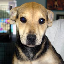

In [41]:
test_image

In [42]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [43]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,64,64,3)

In [44]:
result = classifier.predict(test_image)

In [45]:
result

array([[6.9147834e-09]], dtype=float32)

In [46]:
## Class label of dog and cat

if result == 1:
    prediction = 'dog'
else:
   prediction = 'cat'
    

In [47]:
prediction

'cat'